<a href="https://colab.research.google.com/github/SahilMalavi/Data_Science/blob/TensorFlow/tensorflow_tut1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist_data=tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist_data.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


2


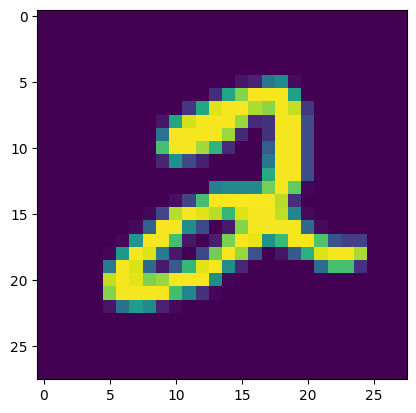

In [5]:
plt.imshow(x_train[5])
print(y_train[5])

In [6]:
model= Sequential()

In [7]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2547 - accuracy: 0.9272
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1133 - accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0785 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0598 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0458 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0350 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0238 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0196 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0902 - accuracy: 0.9767


[0.09015442430973053, 0.9767000079154968]

In [12]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
pred_list = np.argmax(pred,axis=1)

In [18]:
def prediction(num):
  print("\nPredicted Digit:",pred_list[num],"\n\n")
  plt.imshow(x_test[num])


Predicted Digit: 2 




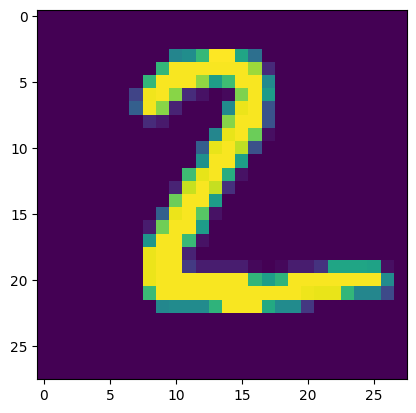

In [20]:
prediction(1)

In [ ]:
fig = plt.figure(figsize=(12, 35))
rows = 20
columns = 5

#first 10 images digit prediction
for i in range(0,10):
  i=i+1
  fig.add_subplot(rows, columns, i)
  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title(str(i)+") Predicted Digit:"+str(pred_list[i]))
